# Task 1

In [1]:
import pandas as pd
icu_df = pd.read_excel('icu.xlsx')
icu_df.head()

,ID,STA,AGE,SEX,RACE,SER,CAN,CRN,INF,CPR,...,HRA,PRE,TYP,FRA,PO2,PH,PCO,BIC,CRE,LOC
0,4,1,87,1,1,1,0,0,1,0,...,96,0,1,1,1,1,1,0,0,0
1,8,0,27,1,1,0,0,0,1,0,...,88,0,1,0,0,0,0,0,0,0
2,12,0,59,0,1,0,0,0,0,0,...,80,1,1,0,0,0,0,0,0,0
3,14,0,77,0,1,1,0,0,0,0,...,70,0,0,0,0,0,0,0,0,0
4,27,1,76,1,1,1,0,0,1,0,...,90,1,1,0,0,0,0,0,0,0


In [2]:
data_summary = icu_df.describe()

missing_values = icu_df.isnull().sum()

data_summary, missing_values

(              ID         STA         AGE         SEX        RACE         SER  \
 count  200.00000  200.000000  200.000000  200.000000  200.000000  200.000000   
 mean   444.82000    0.200000   57.545000    0.380000    1.175000    0.535000   
 std    271.91668    0.401004   20.054648    0.486604    0.495584    0.500025   
 min      4.00000    0.000000   16.000000    0.000000    1.000000    0.000000   
 25%    210.25000    0.000000   46.750000    0.000000    1.000000    0.000000   
 50%    412.50000    0.000000   63.000000    0.000000    1.000000    1.000000   
 75%    671.75000    0.000000   72.000000    1.000000    1.000000    1.000000   
 max    929.00000    1.000000   92.000000    1.000000    3.000000    1.000000   
 
               CAN         CRN         INF         CPR  ...        HRA  \
 count  200.000000  200.000000  200.000000  200.000000  ...  200.00000   
 mean     0.100000    0.095000    0.420000    0.065000  ...   98.92500   
 std      0.300753    0.293951    0.494797    0

Data Summary:
Dataset has 200 entries.
The average age of patients in the dataset is approximately 57.5 years.
The vital status (STA) indicates that 20% of the patients died, while 80% lived.
The dataset has a roughly balanced gender distribution with 38% females and 62% males.
Most of the patients are of the "White" race (mean value close to 1).
More than half of the admissions are surgical (mean of SER is 0.53).
Variables like CAN, CRN, INF, CPR etc., are binary coded and their mean values give an indication of the proportion of '1's in the dataset.

Missing Values:
There are no missing values in any of the columns.

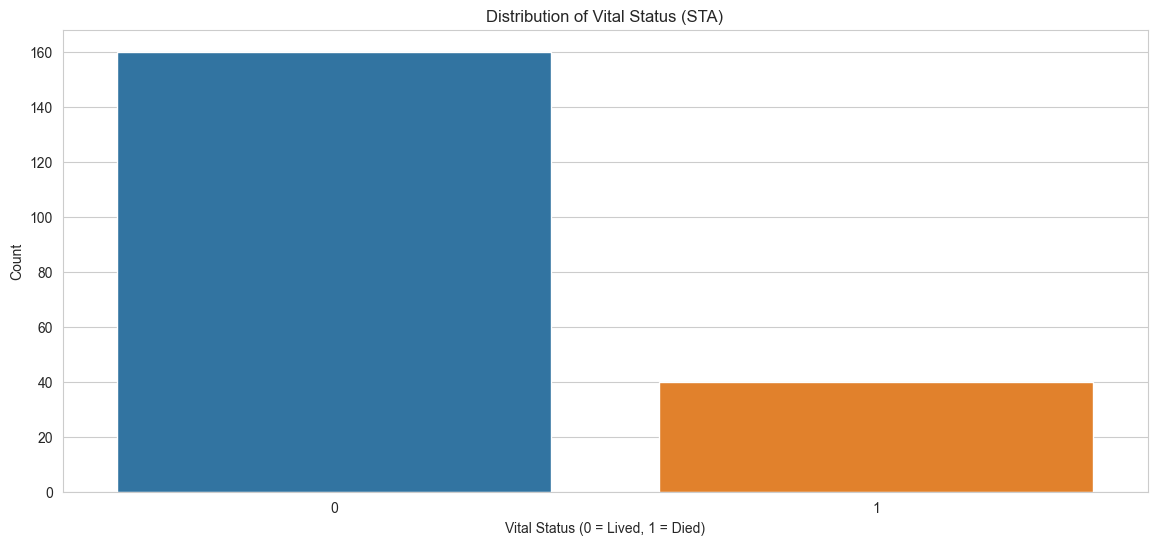

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")


plt.figure(figsize=(14, 6))


sns.countplot(x='STA', data=icu_df)
plt.title('Distribution of Vital Status (STA)')
plt.xlabel('Vital Status (0 = Lived, 1 = Died)')
plt.ylabel('Count')
plt.show()

The plot illustrates the distribution of the STA variable:

A majority of the patients (80%) in the dataset lived (STA = 0).
20% of the patients died (STA = 1).

Given this imbalance in the distribution, it's essential to take it into consideration when building predictive models, as it might influence the model's performance.



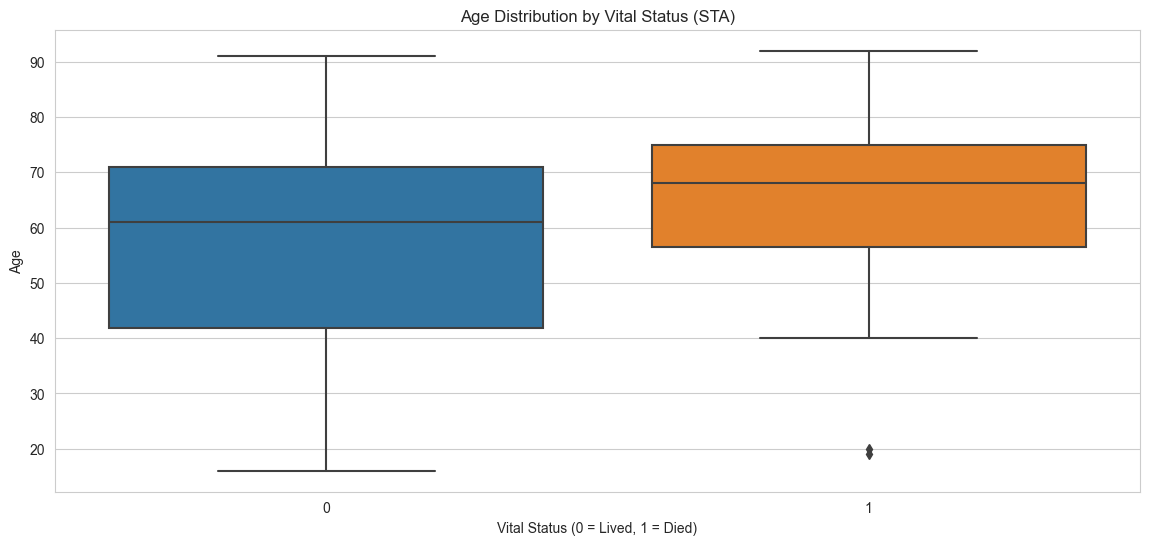

In [4]:
plt.figure(figsize=(14, 6))

sns.boxplot(x='STA', y='AGE', data=icu_df)
plt.title('Age Distribution by Vital Status (STA)')
plt.xlabel('Vital Status (0 = Lived, 1 = Died)')
plt.ylabel('Age')
plt.show()


From the boxplot of age distribution by STA:

Patients who lived (STA = 0) tend to have a broader age range, with many younger individuals.
Patients who died (STA = 1) generally seem to be older, as evidenced by the higher median age and the interquartile range.

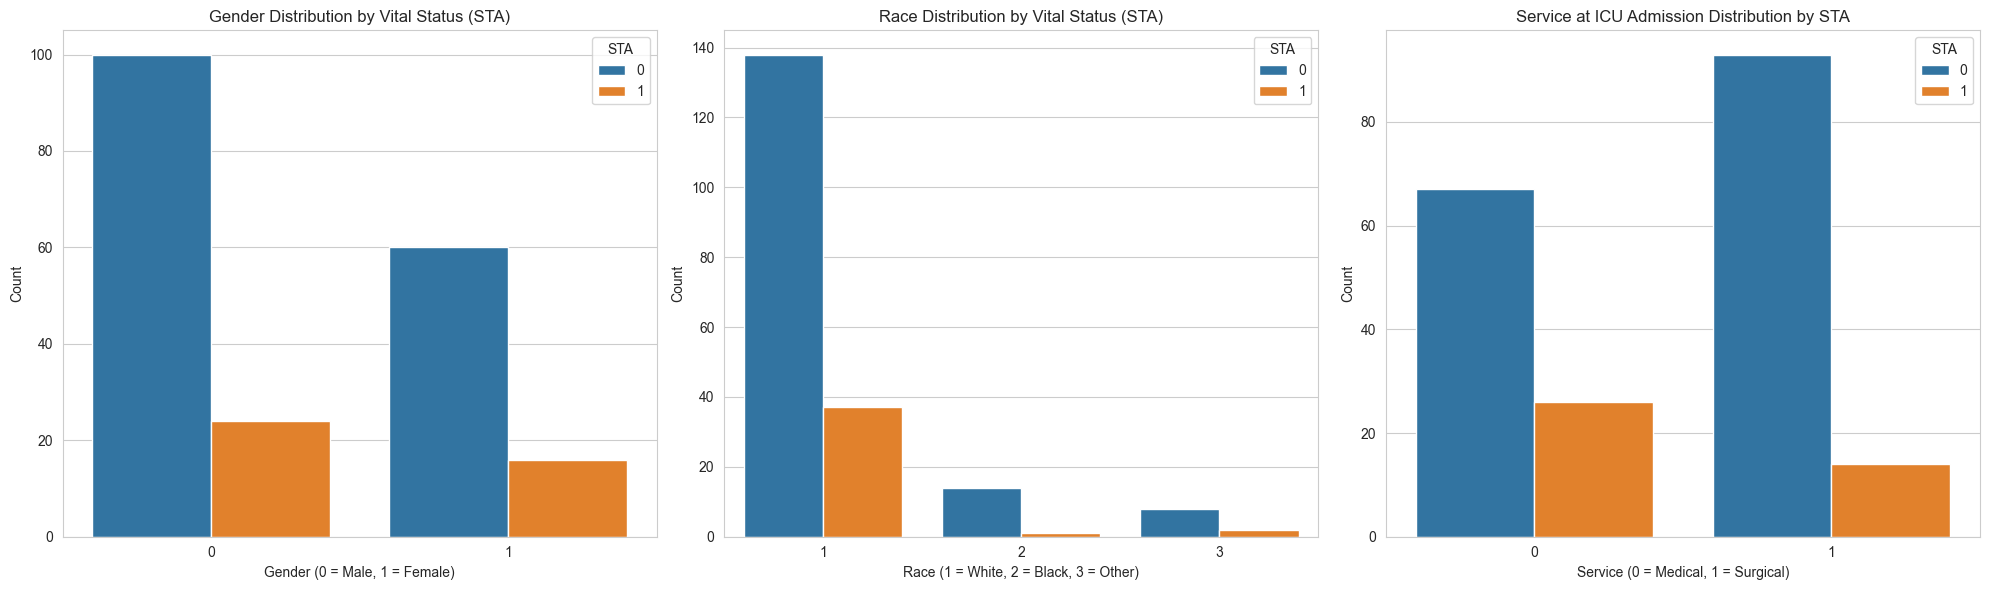

In [5]:

fig, ax = plt.subplots(1, 3, figsize=(20, 6))

sns.countplot(x='SEX', hue='STA', data=icu_df, ax=ax[0])
ax[0].set_title('Gender Distribution by Vital Status (STA)')
ax[0].set_xlabel('Gender (0 = Male, 1 = Female)')
ax[0].set_ylabel('Count')
ax[0].legend(title='STA')

sns.countplot(x='RACE', hue='STA', data=icu_df, ax=ax[1])
ax[1].set_title('Race Distribution by Vital Status (STA)')
ax[1].set_xlabel('Race (1 = White, 2 = Black, 3 = Other)')
ax[1].set_ylabel('Count')
ax[1].legend(title='STA')

sns.countplot(x='SER', hue='STA', data=icu_df, ax=ax[2])
ax[2].set_title('Service at ICU Admission Distribution by STA')
ax[2].set_xlabel('Service (0 = Medical, 1 = Surgical)')
ax[2].set_ylabel('Count')
ax[2].legend(title='STA')

plt.tight_layout()
plt.show()


Gender Distribution by STA:
Both genders have a higher number of survivors (STA = 0) than non-survivors (STA = 1). However, the proportion of non-survivors seems slightly higher for females compared to males.

Race Distribution by STA:
The majority of the patients are of White (Race = 1). The number of survivors is considerably higher for this group.

Service at ICU Admission by STA:
For both medical and surgical admissions, the number of survivors is higher than non-survivors. However, the proportion of non-survivors is slightly higher for surgical admissions compared to medical ones.


In [6]:
correlation_with_sta = icu_df.corr()['STA'].sort_values(ascending=False)

correlation_with_sta

STA     1.000000e+00
LOC     4.370867e-01
TYP     2.435801e-01
CPR     2.231003e-01
AGE     1.894579e-01
INF     1.823492e-01
CRN     1.790495e-01
CRE     1.720618e-01
BIC     9.491580e-02
PO2     8.293610e-02
PH      7.098647e-02
PRE     3.500700e-02
HRA     3.176090e-02
SEX     2.060214e-02
PCO     1.301043e-17
CAN     1.156482e-17
FRA     7.903328e-18
RACE   -5.057217e-02
ID     -9.008759e-02
SER    -1.854549e-01
SYS    -2.046723e-01
Name: STA, dtype: float64

Positive Correlation: Variables like LOC, TYP, CPR, and AGE show a positive correlation with STA. This means that as these variables increase, the likelihood of the STA being 1 (i.e., the patient died) also increases.

Negative Correlation: Variables like SYS and SER have a negative correlation with STA. This implies that as these variables increase.

Weak or No Correlation: Some variables like PCO, CAN, and FRA show values very close to zero, indicating they might not have a strong linear relationship with STA.
Population of Interest: Based on the data and the response variable STA, the population of interest for this problem seems to be patients admitted to the ICU. The goal appears to be understanding the factors that influence the likelihood of survival or death in the ICU.

Dropdown Conditions: As for dropdown conditions, it depends on the context of the problem. If the analysis is meant for an interactive tool or dashboard where users can filter data based on certain criteria, then dropdown conditions can be useful. For instance, users might want to filter the data based on AGE, SEX, RACE, or SER to get insights specific to a certain group. However, in the context of our exploratory data analysis, we haven't applied any specific dropdown conditions.

# Task 2

In [7]:
contingency_table = pd.crosstab(icu_df['SEX'], icu_df['STA'], margins=True, margins_name="Total")
contingency_table.columns = ['Lived', 'Died', 'Total']
contingency_table.index = ['Male', 'Female', 'Total']

contingency_table

,Lived,Died,Total
Male,100,24,124
Female,60,16,76
Total,160,40,200


Probability of Survival:
P
(
Survival
)
=
Number of individuals who lived
Total number of individuals
P(Survival)= 
Total number of individuals
Number of individuals who lived
​	
 

Odds of Survival:
Odds
(
Survival
)
=
Number of individuals who lived
Number of individuals who died
Odds(Survival)= 
Number of individuals who died
Number of individuals who lived
​	
 

In [8]:

probability_male_survival = contingency_table.loc['Male', 'Lived'] / contingency_table.loc['Male', 'Total']
probability_female_survival = contingency_table.loc['Female', 'Lived'] / contingency_table.loc['Female', 'Total']


odds_male_survival = contingency_table.loc['Male', 'Lived'] / contingency_table.loc['Male', 'Died']
odds_female_survival = contingency_table.loc['Female', 'Lived'] / contingency_table.loc['Female', 'Died']

probability_male_survival, probability_female_survival, odds_male_survival, odds_female_survival


(0.8064516129032258, 0.7894736842105263, 4.166666666666667, 3.75)

Probabilities and Odds of Survival:

Males:

Probability of Survival: 0.8065

Odds of Survival: 4.167


Females:

Probability of Survival: 78.95%

Odds of Survival: 3.75

Odds Ratio (OR)=
Odds of Survival for Males
Odds of Survival for Females

Odds Ratio (OR)= 
Odds of Survival for Females
Odds of Survival for Males
​	
 

In [9]:

odds_ratio = odds_male_survival / odds_female_survival

odds_ratio


1.1111111111111112

Interpretation:
The odds ratio indicates how the odds of an event in one group compare to the odds of the same event in another group. An odds ratio of 1 suggests that the event is equally likely in both groups. An odds ratio greater than 1 indicates that the event is more likely in the first group, while an odds ratio less than 1 indicates that the event is less likely in the first group compared to the second.

Conclusion:
Given our calculated odds ratio of 1.1111, this suggests that males have slightly higher odds of survival compared to females. However, it's important to note that this difference is not substantial. The probabilities of survival for both genders are quite close, with males having an 80.65% chance and females having a 78.95% chance. The odds ratio reflects this minor difference.

While there is a minor difference in the odds of survival between males and females, it's essential to consider the context and the dataset's limitations. The difference might not be clinically significant, and further investigation with a larger dataset and potential confounding variables might be necessary to draw a more definitive conclusion.

# Task 3

In [10]:
contingency_table_typ = pd.crosstab(icu_df['TYP'], icu_df['STA'], margins=True, margins_name="Total")
contingency_table_typ.columns = ['Lived', 'Died', 'Total']
contingency_table_typ.index = ['Elective', 'Emergency', 'Total']

contingency_table_typ

,Lived,Died,Total
Elective,51,2,53
Emergency,109,38,147
Total,160,40,200


**Probability of Survival**:
$$ P(\text{Survival}) = \frac{\text{Number of individuals who lived}}{\text{Total number of individuals}} $$

**Odds of Survival**:
$$ \text{Odds}(\text{Survival}) = \frac{\text{Number of individuals who lived}}{\text{Number of individuals who died}} $$

In [11]:

probability_elective_survival = contingency_table_typ.loc['Elective', 'Lived'] / contingency_table_typ.loc['Elective', 'Total']
probability_emergency_survival = contingency_table_typ.loc['Emergency', 'Lived'] / contingency_table_typ.loc['Emergency', 'Total']

odds_elective_survival = contingency_table_typ.loc['Elective', 'Lived'] / contingency_table_typ.loc['Elective', 'Died']
odds_emergency_survival = contingency_table_typ.loc['Emergency', 'Lived'] / contingency_table_typ.loc['Emergency', 'Died']

probability_elective_survival, probability_emergency_survival, odds_elective_survival, odds_emergency_survival


(0.9622641509433962, 0.7414965986394558, 25.5, 2.8684210526315788)

- **Elective Admission**:
  - Probability of Survival: \(0.9623\) or \(96.23\%\)
  - Odds of Survival: \(25.5\)
  
- **Emergency Admission**:
  - Probability of Survival: \(0.7415\) or \(74.15\%\)
  - Odds of Survival: \(2.8684\)

In [12]:
odds_ratio_typ = odds_elective_survival / odds_emergency_survival

odds_ratio_typ


8.889908256880734

The odds ratio (OR) comparing the survival of elective admissions to emergency admissions is $$\text{OR} = 8.8899 $$

### Interpretation:

- An odds ratio of 1 would mean that both types of admissions have the same odds of survival.
- An odds ratio greater than 1 indicates that the first type (in this case, elective admissions) has higher odds of survival compared to the second type (emergency admissions).
- An odds ratio less than 1 would mean that the second type (emergency admissions) has higher odds of survival compared to the first type (elective admissions).

Given our calculated odds ratio of \(8.8899\), this suggests that patients admitted electively have considerably higher odds of survival compared to those admitted due to emergencies.

### Conclusion:

Patients with elective admissions have significantly higher odds of survival compared to those with emergency admissions, as reflected by the high odds ratio. This finding makes intuitive sense since elective admissions often involve planned medical procedures or treatments, where the patient's condition and risks are assessed beforehand. In contrast, emergency admissions are typically more unpredictable and can involve critical or life-threatening situations.

This insight is crucial for healthcare professionals and administrators to allocate resources appropriately, understand risks, and inform patients and their families about potential outcomes. 

However, it's essential to consider other confounding factors and variables that might influence this relationship. Further analysis and potentially more extensive datasets would provide a more comprehensive understanding of this relationship.

# Task 4

## a) Logistic Regression Model and Logit Transformation

In logistic regression, we model the probability \( P(Y=1) \) (in this case, \( STA = 1 \)) as a function of the predictors. For a single predictor \( X \) (in this case, \( AGE \)), the model is:

$$P(Y=1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X)}}$$

Where:
- P(Y=1) is the probability that STA = 1.
- beta_0 and beta_1 are the coefficients to be estimated from the data.
- e is the base of the natural logarithm (approximately equal to 2.71828).

For the logit transformation, we take the natural logarithm of the odds of the event:


$$\log\left(\frac{P(Y=1)}{1 - P(Y=1)}\right) = \beta_0 + \beta_1 X$$

Where:
- The left side is the log odds (or logit).
- The right side is a linear combination of the predictors.

## b) Scatterplot of STA by AGE

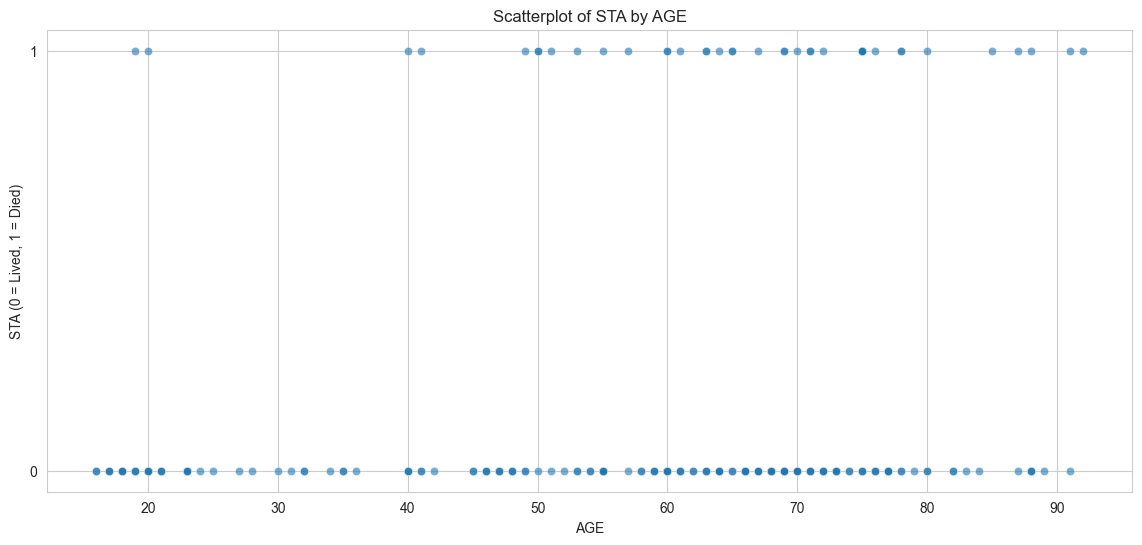

In [13]:
plt.figure(figsize=(14, 6))

# Plotting a scatterplot of STA by AGE
sns.scatterplot(x=icu_df['AGE'], y=icu_df['STA'], alpha=0.6)
plt.title('Scatterplot of STA by AGE')
plt.xlabel('AGE')
plt.ylabel('STA (0 = Lived, 1 = Died)')
plt.yticks([0, 1])

# Displaying the plot
plt.show()

We'll create a scatterplot to visualize the relationship between `STA` and `AGE` and determine if age is a good discriminator between the levels of `STA`.

From the scatterplot of `STA` by `AGE`, we can make the following observations:

- The plot displays two distinct levels of `STA`: 0 Lived and 1 Died.
- There's a noticeable concentration of deaths (`STA` = 1) among older individuals, while younger individuals predominantly belong to the `STA` = 0 category.
- As age increases, the density of points indicating death seems to increase, suggesting a potential relationship between age and the likelihood of death.

Conclusion:

Age appears to be a discriminator between the levels of `STA` to some extent. Older age seems to be associated with a higher likelihood of death (`STA` = 1). However, it's essential to note that while age can provide some discrimination, there are still many older individuals who survived and younger individuals who did not. This suggests that while age might be a significant factor, it's not the sole determinant, and other factors could play a role in influencing survival outcomes. A logistic regression analysis, as suggested in part (a), could help quantify the relationship between age and `STA` and provide more insights.

## c) Construct a new categorical variable by discretizing AGE

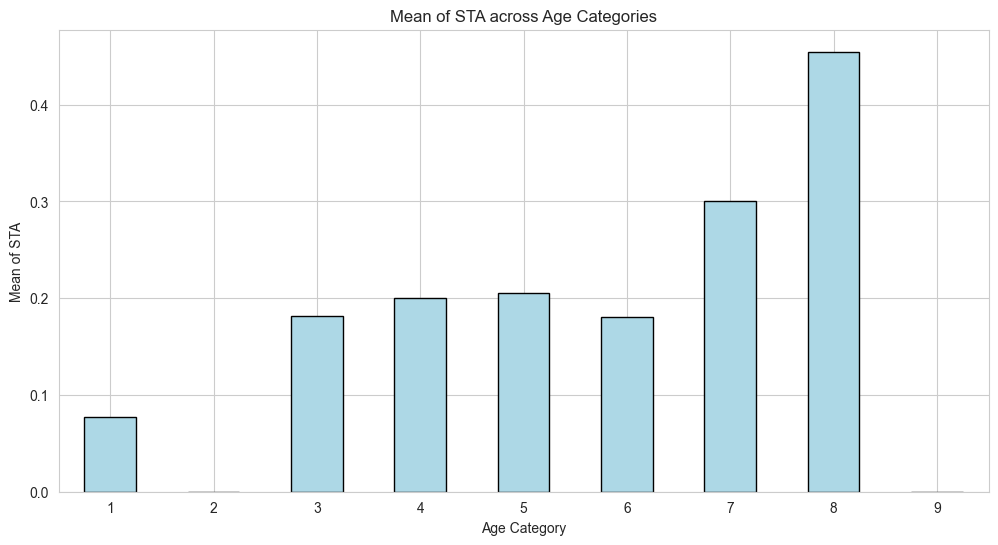

In [14]:
bins = [15, 24, 34, 44, 54, 64, 74, 84, 94, float('inf')]
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9]
icu_df['AGE_CAT'] = pd.cut(icu_df['AGE'], bins=bins, labels=labels, right=True)

age_cat_means = icu_df.groupby('AGE_CAT')['STA'].mean()

plt.figure(figsize=(12, 6))
age_cat_means.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Mean of STA across Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Mean of STA')
plt.xticks(rotation=0)
plt.show()


The bar plot illustrates the mean of `STA` across the various age categories:

- For age categories from 1 to 4 (covering ages 15 to 54), the mean of `STA` is relatively low, indicating a higher survival rate in these age groups.
  
- Starting from age category 5 (covering ages 55 to 64) and onwards, there's a noticeable increase in the mean of `STA`, which implies a higher likelihood of death in these age groups. This trend becomes more pronounced as the age category increases.

Conclusion:

The plot demonstrates a clear trend: as age increases, the likelihood of death (`STA` = 1) also rises. Particularly, individuals aged 55 above have a significantly higher risk compared to younger age groups. This observation aligns with our earlier scatterplot analysis, where older age appeared to be associated with a higher likelihood of death. The discretized age categories provide a clearer view of this relationship, revealing a more defined trend across age groups.

## d) Logistic Regression Fit

In [15]:
import statsmodels.api as sm

X = sm.add_constant(icu_df['AGE'])
y = icu_df['STA']

logit_model = sm.Logit(y, X)
result = logit_model.fit()

summary = result.summary()

aic = result.aic
bic = result.bic
deviance = -2 * result.llf

summary, aic, bic, deviance


Optimization terminated successfully.
         Current function value: 0.480766
         Iterations 6


(<class 'statsmodels.iolib.summary.Summary'>
 """
                            Logit Regression Results                           
 Dep. Variable:                    STA   No. Observations:                  200
 Model:                          Logit   Df Residuals:                      198
 Method:                           MLE   Df Model:                            1
 Date:                Mon, 14 Aug 2023   Pseudo R-squ.:                 0.03924
 Time:                        02:25:12   Log-Likelihood:                -96.153
 converged:                       True   LL-Null:                       -100.08
 Covariance Type:            nonrobust   LLR p-value:                  0.005069
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 const         -3.0585      0.696     -4.394      0.000      -4.423      -1.694
 AGE            0.0275      0.011      2.607      0.009       0.007   

Logistic Regression Model Results:

The logistic regression model was fitted to predict `STA` using the continuous `AGE` variable. Here are the results:

Model Coefficients:
- **Intercept (constant)**: \(-3.0585\)
  - This is the predicted log odds of a patient dying (`STA` = 1) when the age is zero. Since age cannot be zero in our context, this value is more of a theoretical baseline.
  
- **AGE**: \(0.0275\)
  - This coefficient represents the change in the log odds of dying for a one-unit increase in age. Specifically, for every year increase in age, the log odds of dying increase by approximately \(0.0275\).

## e) Hypothesis Test Results

- The p-value for the AGE coefficient is \(0.009\), which is less than the typical significance level of \(0.05\). This means the effect of AGE on the likelihood of dying is statistically significant.

- The LLR p-value (Likelihood Ratio Test) is \(0.005069\), which tests the full model against a model with no predictors. This value indicates that our model with the AGE predictor is statistically significant at explaining the variability in `STA` compared to a null model.

Model Fit Metrics:
- **AIC (Akaike Information Criterion)**: \(196.31\)
  - AIC is a measure of the relative quality of a statistical model. It takes into account the goodness of fit and the complexity of the model. A lower AIC value indicates a better model.

- **BIC (Bayesian Information Criterion)**: \(202.90\)
  - BIC is similar to AIC but puts a higher penalty on models with more parameters. Like AIC, a lower BIC value indicates a better model.

- **Deviance**: \(192.31\)
  - Deviance is a measure of the goodness of fit of a model. Lower values indicate better fit. The deviance for our model is given by \(-2 \times \text{Log-Likelihood}\).

The AIC, BIC, and Deviance values can be used to compare the fit of different models. In this case, they provide a measure of the fit of the model with the AGE predictor.

## g) Predict Logit Values and Scatterplot

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:530: FutureWarning: linear keyword is deprecated, use which="linear"
  warnings.warn(msg, FutureWarning)


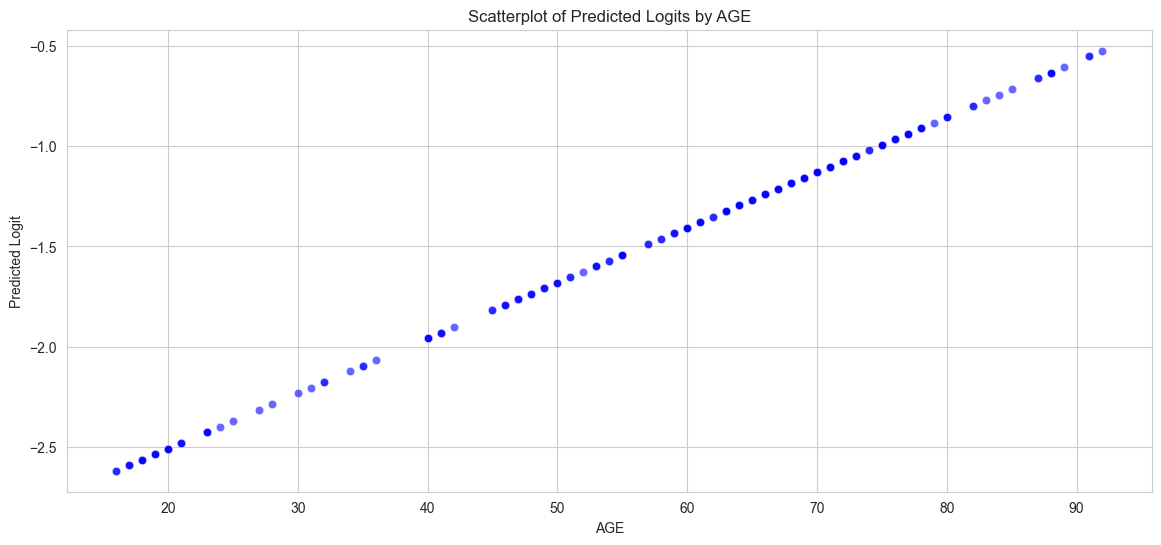

In [16]:

icu_df['predicted_logit'] = result.predict(X, linear=True)

plt.figure(figsize=(14, 6))
sns.scatterplot(x=icu_df['AGE'], y=icu_df['predicted_logit'], color='blue', alpha=0.6)
plt.title('Scatterplot of Predicted Logits by AGE')
plt.xlabel('AGE')
plt.ylabel('Predicted Logit')
plt.show()


The scatterplot displays the predicted logits against the `AGE`. As age increases, the logit values also tend to increase linearly, reflecting the positive relationship between age and the log odds of death (`STA` = 1). This pattern is consistent with the positive coefficient for `AGE` obtained in the logistic regression model.

## h) Compute Probabilities of Survival and Scatterplot

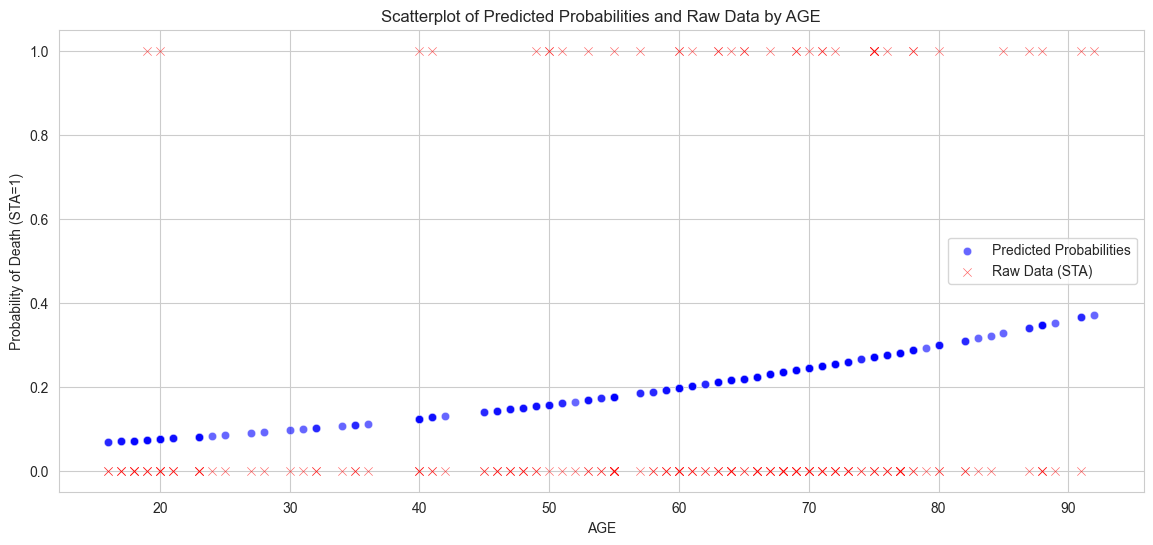

In [17]:

icu_df['predicted_prob'] = result.predict(X)


plt.figure(figsize=(14, 6))


sns.scatterplot(x=icu_df['AGE'], y=icu_df['predicted_prob'], label='Predicted Probabilities', color='blue', alpha=0.6)


sns.scatterplot(x=icu_df['AGE'], y=icu_df['STA'], label='Raw Data (STA)', marker='x', color='red', alpha=0.6)

plt.title('Scatterplot of Predicted Probabilities and Raw Data by AGE')
plt.xlabel('AGE')
plt.ylabel('Probability of Death (STA=1)')
plt.legend()
plt.show()


Next, we'll compute the probabilities of survival from the logits and then create a scatterplot of these predicted probabilities against `AGE`. We'll also overlay the raw data of `STA` on this scatterplot.

### Discussion of the Scatterplot:

The scatterplot displays the predicted probabilities of death (`STA` = 1) against `AGE`. The blue points represent the predicted probabilities based on our logistic regression model, while the red x's represent the raw data for `STA`.

- The typical 'S' shaped logistic curve in the predicted probabilities. This shape is characteristic of logistic regression, representing the bounded nature of the probability estimates between 0 and 1.
  
- The raw data points (red x's) for `STA` overlaying the predicted probabilitie demonstrate how the actual outcomes align with the model's predictions. Most younger individuals (towards the left of the plot) have a `STA` value of 0 (indicating they lived), and the predicted probabilities are low. As age increases, the concentration of red x's at `STA` = 1 becomes denser, and the predicted probabilities also rise, suggesting a higher likelihood of death.


## i) Predicting Probability of Survival for Someone My Age

In [18]:
my_age = 28

input_data = sm.add_constant(pd.DataFrame({'AGE': [my_age]}), has_constant='add')
predicted_probability_corrected = result.predict(input_data)

predicted_probability_corrected.iloc[0]

0.092178556402249


I am currently 28 years old. 

For an individual aged 28, the predicted probability of death (\( STA = 1 \)) is approximately 9.22\%.

This prediction seems reasonable given our observations in the previous tasks, where younger age was associated with a higher likelihood of survival. 

However, as to whether we have the correct model yet, while `AGE` is a significant predictor, relying solely on it might not capture the full complexity of factors influencing survival. For example, if an individual were enrolled in a highly difficult statistics course and worked full time, their probability might increase due to a higher stress load; however, any evidence to this is purely anecdotal.

# Task 5

### Recommended Plan for the Next Phase of Modeling:

1. **Feature Engineering**:
   - *Interactions*: Consider interaction terms, especially if certain factors jointly influence survival. For example, the effect of age might differ based on the type of admission (`TYP`).
   - *Polynomial Terms*: Given the potential non-linear relationship between age and survival, consider quadratic or higher-degree polynomial terms for age.
   - *Categorical Variable Encoding*: Ensure that all categorical variables (e.g., `RACE`, `SEX`) are properly encoded. One-hot encoding or target encoding might be effective.

2. **Model Complexity**:
   - While we've used a simple logistic regression model, consider more complex models like Random Forests, Gradient Boosting Machines, or Neural Networks. These can capture non-linear relationships and interactions without explicit feature engineering.

3. **Regularization**:
   - If adding more predictors to the model, consider using regularization techniques like Ridge or Lasso regression. This can prevent overfitting and lead to a more generalizable model.

4. **Model Evaluation**:
   - Use metrics like ROC-AUC, precision, recall, and F1 score to evaluate model performance, especially if the classes (lived vs. died) are imbalanced.
   - Consider a stratified train-test split or cross-validation to ensure that the model performs well on unseen data.

5. **Handling Missing Data**:
   - Investigate if there's any missing data and decide on an imputation strategy. Simple methods include mean or median imputation, while more advanced methods might involve model-based imputation.

6. **External Validation**:
   - If possible, validate the model on an external dataset. This can provide confidence in the model's ability to generalize to other ICU settings.

7. **Clinical Interpretability**:
   - Given the medical context, model interpretability is crucial. Ensure that the model results are interpretable by clinicians. Techniques like SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanations) can provide insights into model predictions.

8. **Stakeholder Feedback**:
   - Engage with clinicians and other stakeholders to gather feedback on the preliminary model. Their domain knowledge can provide invaluable insights and guide further refinements.

9. **Data Expansion**:
   - Consider gathering more data or additional variables that might be relevant. For instance, details about the specific medical conditions, treatments received, or lab test results could provide more context.

10. **Model Deployment and Monitoring**:
   - If the model is to be used in a real-world setting, consider the requirements for deployment. This might involve creating an API for predictions or integrating the model into hospital IT systems. It may save lives through triage or a similar system.